/tmp/ipython-input-2233678834.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(


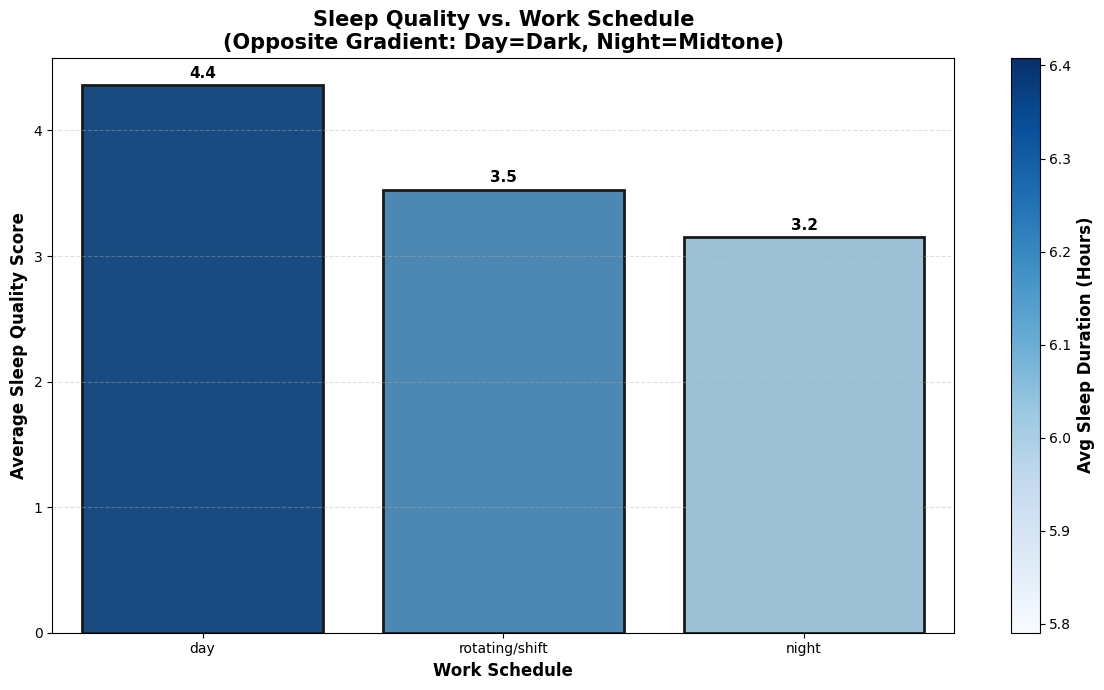

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# --- STEP 0: CLEAN DATA ---
df_clean = dataframe.dropna(subset=['work_schedule'])
df_clean = df_clean[df_clean['work_schedule'].astype(str).str.lower() != 'none']

# --- STEP 1: GROUP BY ---
df_grouped = df_clean.groupby('work_schedule').agg({
    'sleep_quality_score': 'mean',
    'sleep_duration_hours': 'mean'
}).reset_index()

# --- STEP 2: SORT ---
# We keep sorting by quality so the "Day" (highest) is on the left
df_grouped = df_grouped.sort_values('sleep_quality_score', ascending=False)

# --- STEP 3: CREATE REVERSED MIDTONE BLUE PALETTE ---
# Slicing 'Blues' from 0.4 to 0.9, then reversing it (_r)
# Higher sleep quality will now receive the darker 0.9 end.
blue_cmap = plt.cm.Blues_r
midtone_blues_rev = mcolors.LinearSegmentedColormap.from_list(
    'midtone_blues_rev', blue_cmap(np.linspace(0.1, 0.6, 256)) # Adjusted indices for reversed darkness
)

# --- STEP 4: PLOT ---
plt.figure(figsize=(12, 7))

# Create the color list directly from the reversed midtone range
# This ensures Day = Dark and Night = Light Midtone
color_list = plt.cm.Blues(np.linspace(0.9, 0.4, len(df_grouped)))

plot = sns.barplot(
    data=df_grouped,
    x='work_schedule',
    y='sleep_quality_score',
    palette=list(color_list),
    edgecolor="0.1",
    linewidth=2.0
)

# --- STEP 5: COLORBAR (Reversed Coherence) ---
norm = plt.Normalize(df_grouped['sleep_duration_hours'].min(),
                     df_grouped['sleep_duration_hours'].max())
# We use the reversed map so the colorbar matches the bars
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Avg Sleep Duration (Hours)', fontsize=12, fontweight='bold')

# Add bold numeric labels on top
for i in plot.containers:
    plot.bar_label(i, fmt='%.1f', padding=3, fontweight='bold', fontsize=11)

# --- STEP 6: CUSTOMIZE ---
plt.title('Sleep Quality vs. Work Schedule\n(Opposite Gradient: Day=Dark, Night=Midtone)', fontsize=15, fontweight='bold')
plt.xlabel('Work Schedule', fontsize=12, fontweight='bold')
plt.ylabel('Average Sleep Quality Score', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()